<a href="https://colab.research.google.com/github/praneash2/machine-learning/blob/main/cnn_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()
plt.imshow(x_train[0],cmap=plt.get_cmap("grey"))

ValueError: ignored

In [ ]:

x_train=x_train/255.0

#plt.imshow(x_train[1])

In [ ]:
print(y_train[1])

[9]


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(x_train.shape)       

(50000, 32, 32, 3)


In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='valid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),padding='valid') )
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='valid' ) )
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid') )
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='valid') )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='Adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 67s 53ms/step - loss: 1.5586 - accuracy: 0.4342 - val_loss: 1.2914 - val_accuracy: 0.5454
Epoch 2/15
1250/1250 [==============================] - 57s 46ms/step - loss: 1.2104 - accuracy: 0.5716 - val_loss: 1.1368 - val_accuracy: 0.5966
Epoch 3/15
1250/1250 [==============================] - 58s 46ms/step - loss: 1.0622 - accuracy: 0.6259 - val_loss: 1.0932 - val_accuracy: 0.6156
Epoch 4/15
1250/1250 [==============================] - 58s 46ms/step - loss: 0.9673 - accuracy: 0.6620 - val_loss: 0.9888 - val_accuracy: 0.6487
Epoch 5/15
1250/1250 [==============================] - 58s 46ms/step - loss: 0.8886 - accuracy: 0.6910 - val_loss: 0.9226 - val_accuracy: 0.6819
Epoch 6/15
1250/1250 [==============================] - 58s 47ms/step - loss: 0.8219 - accuracy: 0.7146 - val_loss: 0.9807 - val_accuracy: 0.6581
Epoch 7/15
1250/1250 [==============================] - 59s 47ms/step - loss: 0.7751 - accuracy: 0.7292 - val_loss: 0.8794 -

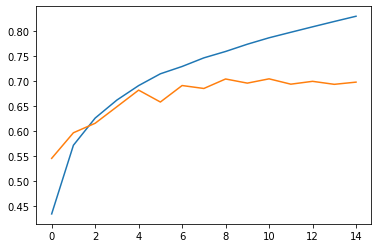

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
x_test=x_test/255
prediction=model.predict(x_test)


In [ ]:
count=0
for i in range(200):
  k=(class_names[np.argmax(prediction[i])])
  a=y_test[i]
  a=(class_names[int(a)])
  if a==k:
    count+=1
print(count)    

140


In [ ]:
!nvidia-smi


Sat Apr  2 18:14:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import random
random.sample([1,2,3,4],3)


[4, 2, 3]